In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv("Unemployment in India.csv", parse_dates=[" Date"])
# to remove space from column name 
df.columns = df.columns.str.replace(' ', '') 

In [3]:
df.sample()

,Region,Date,Frequency,EstimatedUnemploymentRate(%),EstimatedEmployed,EstimatedLabourParticipationRate(%),Area
70,Goa,2019-07-31,Monthly,10.98,167437.0,39.81,Rural


In [4]:
# Columns of the dataset
df.columns

Index(['Region', 'Date', 'Frequency', 'EstimatedUnemploymentRate(%)',
       'EstimatedEmployed', 'EstimatedLabourParticipationRate(%)', 'Area'],
      dtype='object')

In [5]:
# Basic dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Region                               740 non-null    object        
 1   Date                                 740 non-null    datetime64[ns]
 2   Frequency                            740 non-null    object        
 3   EstimatedUnemploymentRate(%)         740 non-null    float64       
 4   EstimatedEmployed                    740 non-null    float64       
 5   EstimatedLabourParticipationRate(%)  740 non-null    float64       
 6   Area                                 740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 42.1+ KB


In [6]:
df.describe()

,EstimatedUnemploymentRate(%),EstimatedEmployed,EstimatedLabourParticipationRate(%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [7]:
# Checking for missing values
df.isnull().sum()

Region                                 28
Date                                   28
Frequency                              28
EstimatedUnemploymentRate(%)           28
EstimatedEmployed                      28
EstimatedLabourParticipationRate(%)    28
Area                                   28
dtype: int64

In [8]:
# Removing the Missing Value
df = df.dropna(how='any', axis=0).reset_index(drop = True)
df.isnull().sum()

Region                                 0
Date                                   0
Frequency                              0
EstimatedUnemploymentRate(%)           0
EstimatedEmployed                      0
EstimatedLabourParticipationRate(%)    0
Area                                   0
dtype: int64

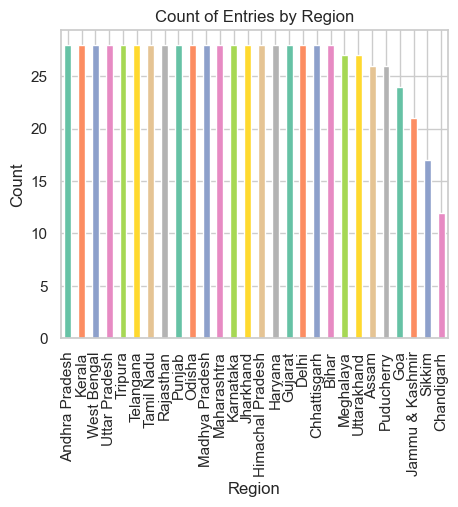

In [9]:
# Count of Region
sns.set(style="whitegrid")
plt.figure(figsize=(5,4))
colors = sns.color_palette("Set2")
df.Region.value_counts().plot(kind='bar', color = colors)

plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Count of Entries by Region')
plt.show()

In [10]:
# Modification of frequency column
df.Frequency = df.Frequency.apply(lambda x : x.replace(' ',''))
df.Frequency.value_counts()

Monthly    740
Name: Frequency, dtype: int64

## Analysis by Region

In [11]:
# Gruoping the dataset wrt Region
group_region = df.groupby("Region")

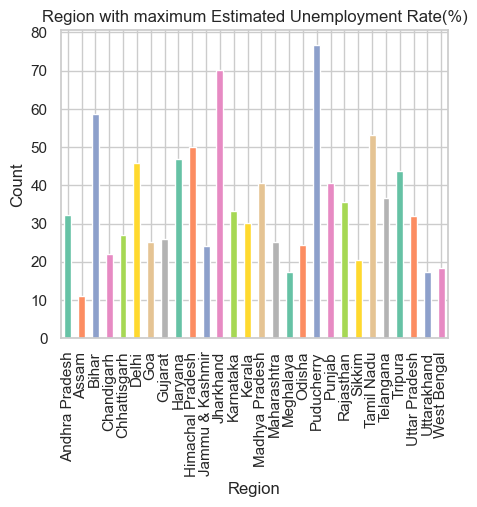

In [12]:
# Maximum Estimated Unemployment Rate(%) of each Region
# print(group_region.max()["EstimatedUnemploymentRate(%)"])

sns.set(style="whitegrid")
plt.figure(figsize=(5,4))
colors = sns.color_palette("Set2")
group_region.max()["EstimatedUnemploymentRate(%)"].plot(kind='bar', color=colors)

plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Region with maximum Estimated Unemployment Rate(%)')
plt.show()

During Covid-19, Puducherry is estimated with highest unemployment rate which is 76.74%.

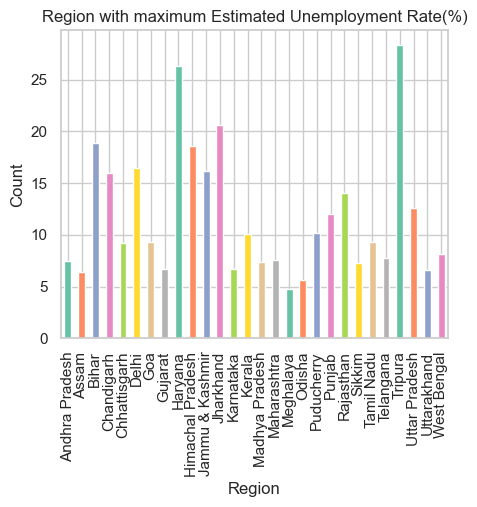

In [13]:
# Mean Estimated UnEmployement Rate by Region

sns.set(style="whitegrid")
plt.figure(figsize=(5,4))
colors = sns.color_palette("Set2")
group_region.mean()["EstimatedUnemploymentRate(%)"].plot(kind='bar', color=colors)

plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Region with maximum Estimated Unemployment Rate(%)')
plt.show()

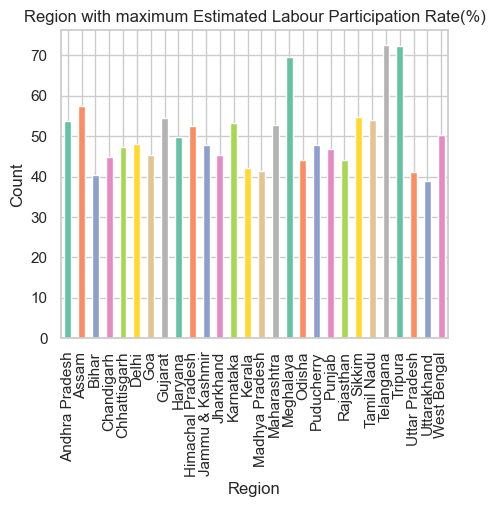

In [14]:
# Maximum Estimated Labour Participation Rate(%) of each Region
# print(group_region.max()["EstimatedLabourParticipationRate(%)"])

sns.set(style="whitegrid")
plt.figure(figsize=(5,4))
colors = sns.color_palette("Set2")
group_region.max()["EstimatedLabourParticipationRate(%)"].plot(kind='bar', color=colors)

plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Region with maximum Estimated Labour Participation Rate(%)')
plt.show()

During Covid-19, Telangana is estimated with highest Labour Participation rate which is 72.57%.

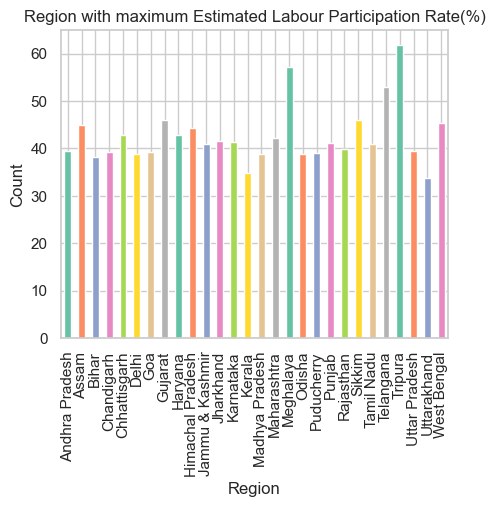

In [15]:
# Mean Estimated UnEmployement Rate by Region

sns.set(style="whitegrid")
plt.figure(figsize=(5,4))
colors = sns.color_palette("Set2")
group_region.mean()["EstimatedLabourParticipationRate(%)"].plot(kind='bar', color=colors)

plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Region with maximum Estimated Labour Participation Rate(%)')
plt.show()

## Analysis by Month

In [16]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Month'] = df['Month'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr' , 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
df.head()

,Region,Date,Frequency,EstimatedUnemploymentRate(%),EstimatedEmployed,EstimatedLabourParticipationRate(%),Area,Year,Month
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,2019,May
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,2019,Jun
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,2019,Jul
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,2019,Aug
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,2019,Sep


In [17]:
# Gruoping the dataset wrt Month for Year 2019
group_month_2019 = df[df['Year'] == 2019].groupby("Month")
group_month_2019_mean = group_month_2019.mean()
group_month_2019_mean = group_month_2019_mean.reset_index().drop(['Year', 'EstimatedEmployed'], axis=1)

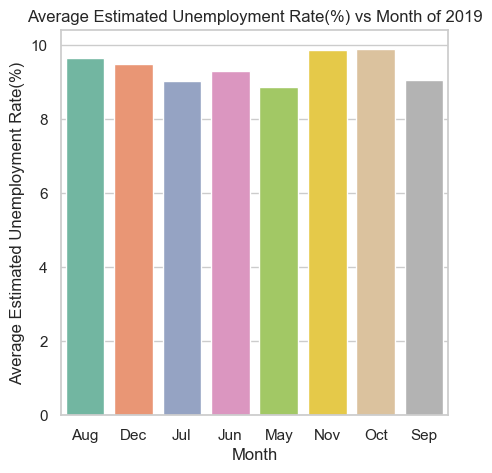

In [18]:
sns.set(style="whitegrid")
plt.figure(figsize=(5,5))
sns.barplot(x=group_month_2019_mean["Month"], y=group_month_2019_mean["EstimatedUnemploymentRate(%)"], palette='Set2')

plt.xlabel("Month")
plt.ylabel("Average Estimated Unemployment Rate(%)")
plt.title("Average Estimated Unemployment Rate(%) vs Month of 2019")
plt.show()

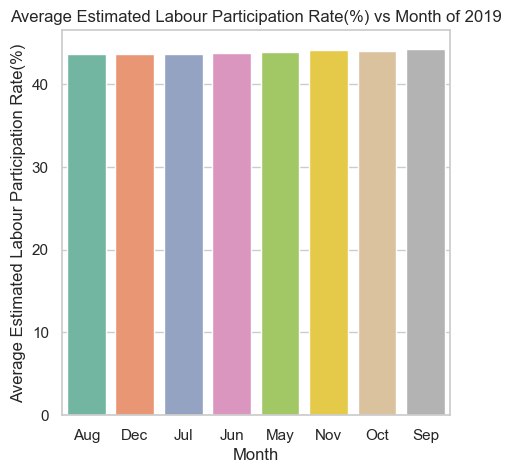

In [19]:
sns.set(style="whitegrid")
plt.figure(figsize=(5,5))
sns.barplot(x=group_month_2019_mean["Month"], y=group_month_2019_mean["EstimatedLabourParticipationRate(%)"], palette='Set2')

plt.xlabel("Month")
plt.ylabel("Average Estimated Labour Participation Rate(%)")
plt.title("Average Estimated Labour Participation Rate(%) vs Month of 2019")
plt.show()

In [20]:
# Gruoping the dataset wrt Month for Year 2020
group_month_2020 = df[df['Year'] == 2020].groupby("Month")
group_month_2020_mean = group_month_2020.mean()
group_month_2020_mean = group_month_2020_mean.reset_index().drop(['Year', 'EstimatedEmployed'], axis=1)

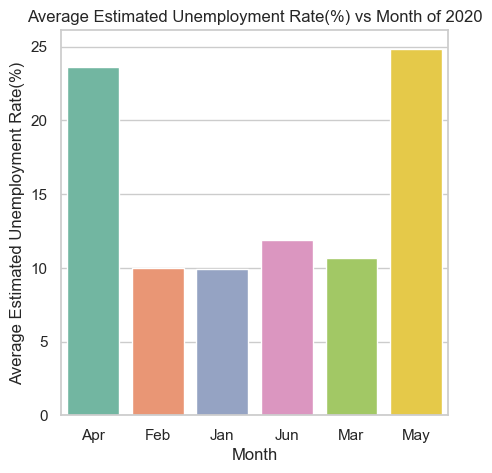

In [21]:
sns.set(style="whitegrid")
plt.figure(figsize=(5,5))
sns.barplot(x=group_month_2020_mean["Month"], y=group_month_2020_mean["EstimatedUnemploymentRate(%)"], palette='Set2')

plt.xlabel("Month")
plt.ylabel("Average Estimated Unemployment Rate(%)")
plt.title("Average Estimated Unemployment Rate(%) vs Month of 2020")
plt.show()

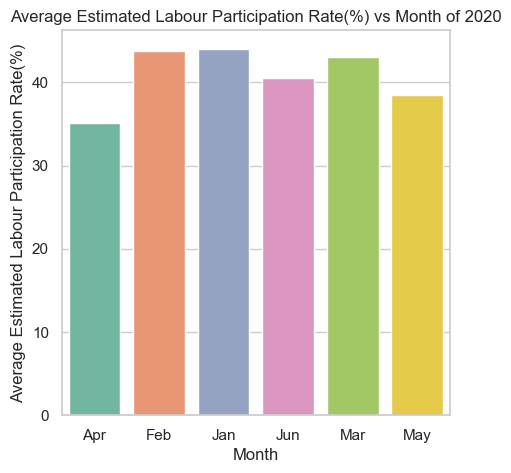

In [22]:
sns.set(style="whitegrid")
plt.figure(figsize=(5,5))
sns.barplot(x=group_month_2020_mean["Month"], y=group_month_2020_mean["EstimatedLabourParticipationRate(%)"], palette='Set2')

plt.xlabel("Month")
plt.ylabel("Average Estimated Labour Participation Rate(%)")
plt.title("Average Estimated Labour Participation Rate(%) vs Month of 2020")
plt.show()

## Analysis by Area

Urban    381
Rural    359
Name: Area, dtype: int64


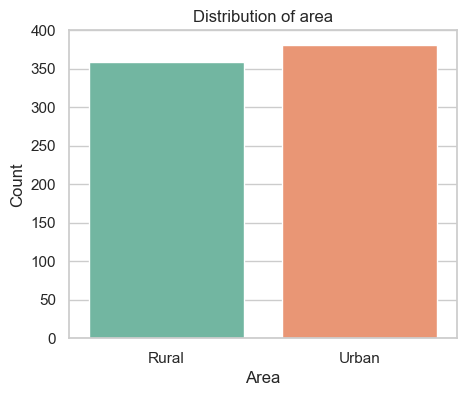

In [23]:
# Distribution of area
print(df["Area"].value_counts())

sns.set(style="whitegrid")
plt.figure(figsize=(5,4))
sns.countplot(x=df['Area'], palette="Set2")

plt.xlabel("Area")
plt.ylabel("Count")
plt.title("Distribution of area")
plt.show()

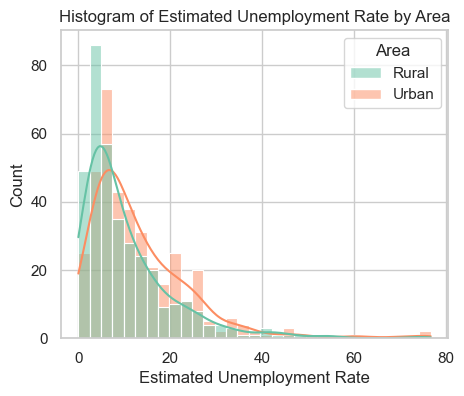

In [24]:
# Histogram of Estimated Unemployment Rate by Area
sns.set(style="whitegrid")
plt.figure(figsize=(5, 4))
sns.histplot(x="EstimatedUnemploymentRate(%)", hue="Area", data=df, kde=True, palette="Set2")
plt.title("Histogram of Estimated Unemployment Rate by Area")
plt.xlabel("Estimated Unemployment Rate")
plt.ylabel("Count")
plt.show()

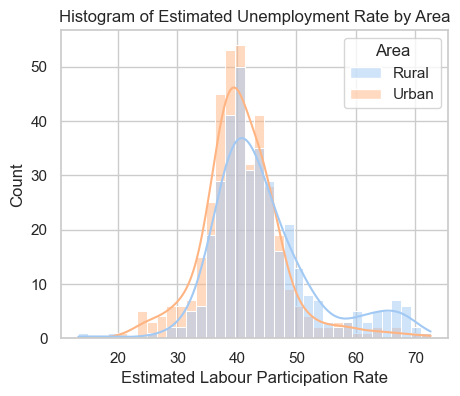

In [25]:
# Histogram of Estimated Labour Participation Rate by Area
sns.set(style="whitegrid")
plt.figure(figsize=(5, 4))
sns.histplot(x="EstimatedLabourParticipationRate(%)", hue="Area", data=df, kde=True, palette="pastel")
plt.title("Histogram of Estimated Unemployment Rate by Area")
plt.xlabel("Estimated Labour Participation Rate")
plt.ylabel("Count")
plt.show()